# **Import Libraries**

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib . pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# **Load Train Dataset**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/xray_dataset_covid19/train', 
                                                 target_size = (224,224), 
                                                 batch_size = 32, 
                                                 color_mode = 'grayscale' , 
                                                 class_mode = 'binary')
training_set.class_indices

Found 148 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

# Load Test Dataset

In [4]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/xray_dataset_covid19/test', 
                                             target_size =(224,224), 
                                             batch_size = 32, 
                                             color_mode = 'grayscale', 
                                             class_mode = 'binary')

Found 40 images belonging to 2 classes.


# **Visualize Images**

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


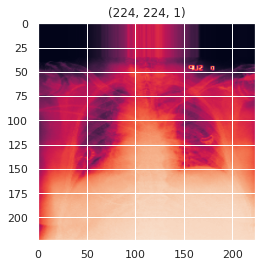

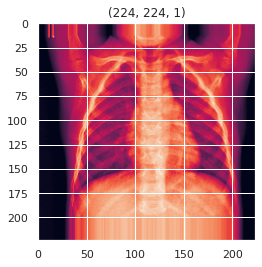

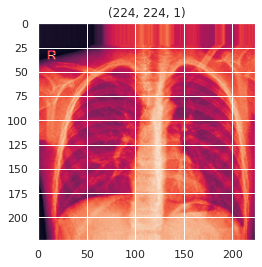

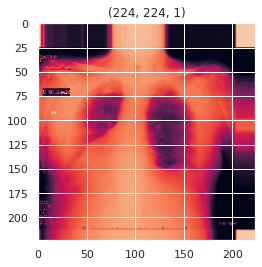

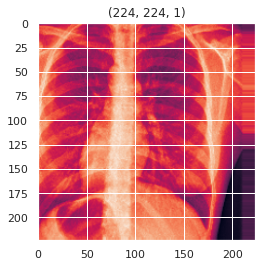

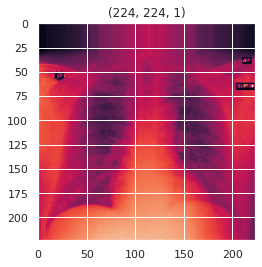

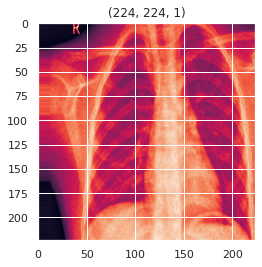

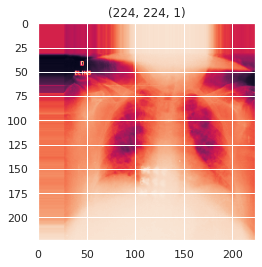

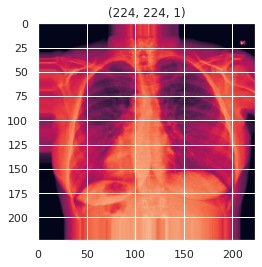

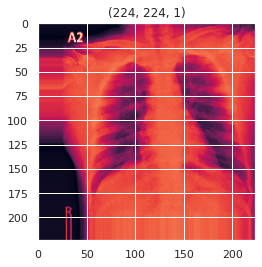

In [5]:
t_img , label = training_set.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

plotImages(t_img, label)

# **Model**

In [6]:
model = tf.keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (1,1), input_shape = [224,224,1]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 32))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 64))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 128))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 256))
model.add(Activation('relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      64        
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                    

# **Model Training**

In [33]:
history=model.fit(training_set, validation_data = test_set, epochs =50)

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 0.6974 - accuracy: 0.5541 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 0.6869 - accuracy: 0.5068 - val_loss: 0.6311 - val_accuracy: 0.9500
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.5996 - accuracy: 0.8108 - val_loss: 0.4303 - val_accuracy: 0.8750
Epoch 4/50
5/5 [==============================] - 7s 2s/step - loss: 0.5226 - accuracy: 0.7770 - val_loss: 0.2513 - val_accuracy: 0.9750
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 0.3894 - accuracy: 0.8243 - val_loss: 0.1859 - val_accuracy: 0.9750
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.3509 - accuracy: 0.8851 - val_loss: 0.1790 - val_accuracy: 0.9750
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 0.2885 - accuracy: 0.8784 - val_loss: 0.1638 - val_accuracy: 0.9500
Epoch 8/50
5/5 [========================

In [8]:
#model.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/pneumonia.h5') 
model = load_model('/content/drive/MyDrive/Colab_Notebooks/DL Model/pneumonia.h5')

# **Accuracy, Loss Comparison**

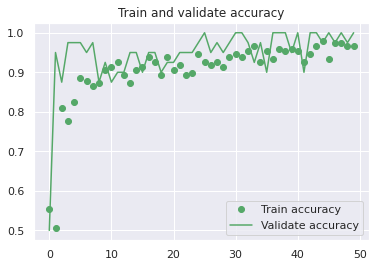

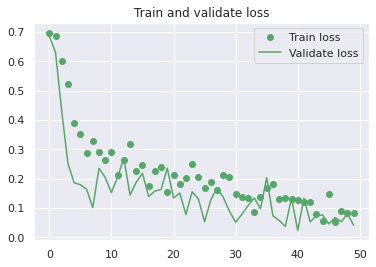

In [35]:
acc = history.history['accuracy']                          
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show() 

# **Evaluate**

In [10]:
results=model.evaluate(test_set,verbose=True)
print(f'Test results - Loss: {results[0]} - Accuracy: {100*results[1]}%')

2/2 [==============================] - 3s 299ms/step - loss: 0.0575 - accuracy: 1.0000
Test results - Loss: 0.05750381201505661 - Accuracy: 100.0%


In [18]:
pred_probabilities = model.predict(test_set)
test_set.classes
predictions = pred_probabilities > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


2/2 [==============================] - 3s 299ms/step
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.65      0.65      0.65        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



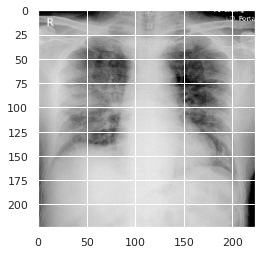

1/1 [==============================] - 0s 213ms/step
PNEUMONIA


In [13]:
image = load_img('/content/drive/MyDrive/Colab_Notebooks/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg',target_size=(224,224), color_mode="grayscale")
plt.imshow(image, cmap='gray')
plt.show()
input_arr = img_to_array(image)
input_arr = np.array([input_arr]) 
if model.predict(input_arr) == 1:
    print ("PNEUMONIA")
else:
    print ("NORMAL")